# Explore here

In [151]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score

from pickle import dump

In [152]:
cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))


Files in 'c:\\Users\\34616\\Documents\\4GEEKS\\clases\\clase20_decisiontrees\\decision-trees\\src': ['app.py', 'explore.ipynb', 'utils.py']


In [153]:
# Your code here
import pandas as pd

url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
urldata = pd.read_csv(url)
urldata.to_csv(r'C:\Users\34616\Documents\4GEEKS\clases\clase20_decisiontrees\decision-trees\data\raw\total_data.csv')
rawdata = pd.read_csv(r'C:\Users\34616\Documents\4GEEKS\clases\clase20_decisiontrees\decision-trees\data\raw\total_data.csv', index_col=False)
rawdata.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1


In [154]:
rawdata = rawdata.drop('Unnamed: 0', axis=1)
rawdata.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


<Axes: >

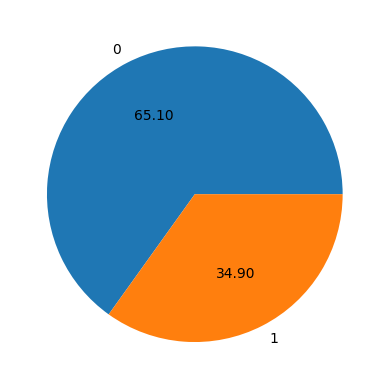

In [155]:
rawdata.groupby('Outcome').size().plot(kind='pie', autopct='%.2f')

In [156]:
print(rawdata.shape)
print(rawdata.info())
print("")
print(f"Dupes: {rawdata.duplicated().sum()}")
print(f"NaNs: ")
print(rawdata.isna().sum())
print("")
print(f"Nulls: ")
print(rawdata.isnull().sum())


(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Dupes: 0
NaNs: 
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0

## Finding and removing outliers

In [157]:
rawdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Pregnancies

(14, 9)


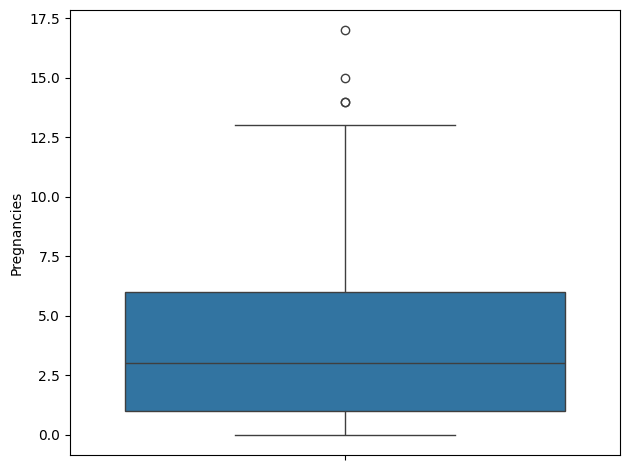

In [158]:
# finding aoutliers
print(rawdata[rawdata['Pregnancies'] >= 13].shape)

sns.boxplot(rawdata['Pregnancies'])
plt.tight_layout()
plt.show()

In [159]:
rawdata = rawdata[rawdata['Pregnancies'] <= 13]
rawdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,3.786649,120.776178,69.098168,20.476440,79.683246,31.966099,0.472260,33.187173,0.345550
std,3.278714,31.946234,19.401789,15.966814,115.436078,7.894034,0.331619,11.764745,0.475859
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,27.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.500000,0.626250,40.250000,1.000000
max,13.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Glucose

349     0
182     0
342     0
75      0
502     0
62     44
680    56
146    57
537    57
352    61
Name: Glucose, dtype: int64
(5, 9)


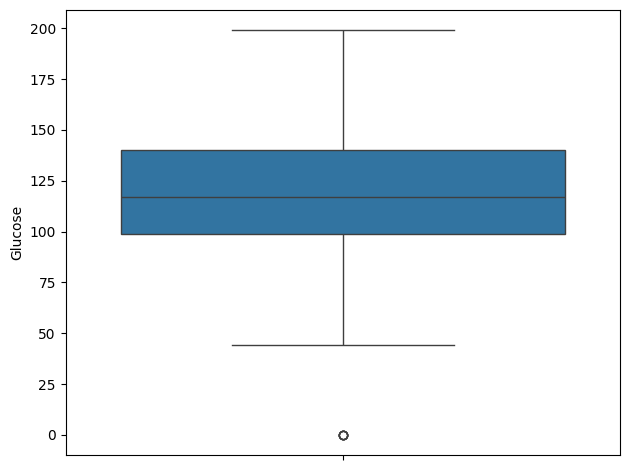

In [160]:
print(rawdata['Glucose'].sort_values(ascending=True).head(10))
print(rawdata[rawdata['Glucose'] == 0].shape)

sns.boxplot(rawdata['Glucose'])
plt.tight_layout()
plt.show()

In [161]:
rawdata = rawdata[rawdata['Glucose'] > 0]
rawdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,3.793149,121.571805,69.108037,20.416337,80.177866,31.960079,0.472867,33.217391,0.345191
std,3.283549,30.503121,19.445653,15.987728,115.652052,7.903176,0.332258,11.776902,0.475744
min,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,128.500000,36.500000,0.626500,40.500000,1.000000
max,13.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Blood Pressure

(35, 9)


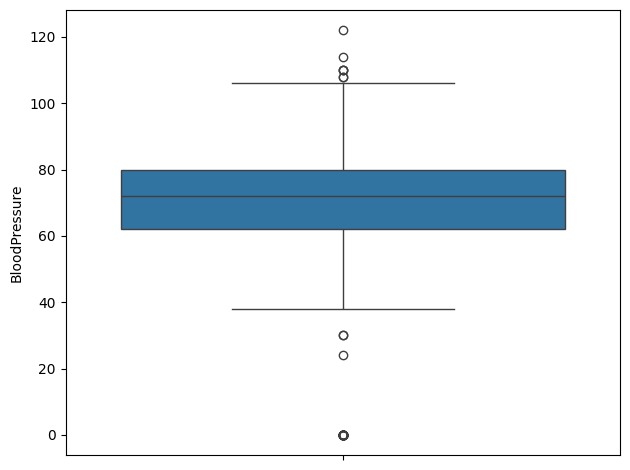

In [162]:
print(rawdata[rawdata['BloodPressure'] == 0].shape)
sns.boxplot(rawdata['BloodPressure'])
plt.tight_layout()
plt.show()

In [166]:
rawdata = rawdata[rawdata['BloodPressure'] > 0]
rawdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.801105,121.754144,72.448895,21.330110,84.053867,32.262431,0.476949,33.338398,0.339779
std,3.267544,30.646791,12.412187,15.747493,117.032682,7.286563,0.335168,11.855638,0.473962
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.400000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,47.000000,32.150000,0.380000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,130.000000,36.525000,0.629500,41.000000,1.000000
max,13.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Skin Thickness

Top outliers: 0
Zeros: 194


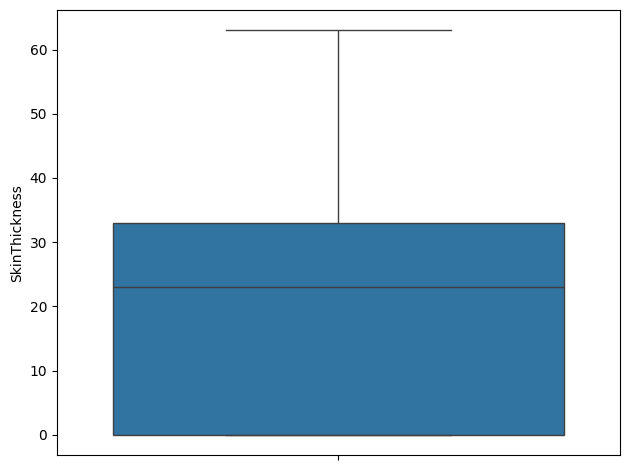

In [168]:
print(f"Top outliers: {len(rawdata[rawdata['SkinThickness'] > 80])}")
print(f"Zeros: {len(rawdata[rawdata['SkinThickness'] == 0])}")


sns.boxplot(rawdata['SkinThickness'])
plt.tight_layout()
plt.show()

##### First we remove the top outlier

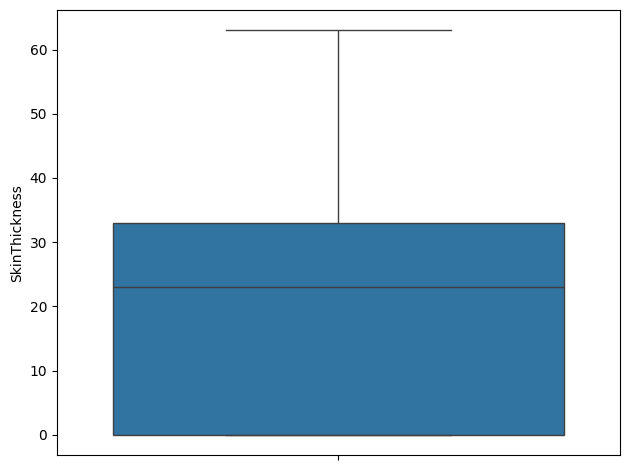

In [169]:
rawdata = rawdata[rawdata['SkinThickness'] <= 80]
sns.boxplot(rawdata['SkinThickness'])
plt.tight_layout()
plt.show()

### Skin thickness can't be zero. We need to deal with the 194 zeros

In [176]:
zeros = len(rawdata[rawdata['SkinThickness'] == 0])
total = len(rawdata)

print(f"Zeros % = {round((zeros/total)*100, 3)}")

# since it is a high percentage of zeros, we are first going to try a model without that column

df_noskin = rawdata.drop('SkinThickness', axis=1)

df_noskin



Zeros % = 26.833


,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,0
764,2,122,70,0,36.8,0.340,27,0
765,5,121,72,112,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


### Now we continue to find other outliers to perfect the data


In [179]:
rawdata['Insulin'].describe()

count    723.000000
mean      84.170124
std      117.071858
min        0.000000
25%        0.000000
50%       48.000000
75%      130.000000
max      846.000000
Name: Insulin, dtype: float64

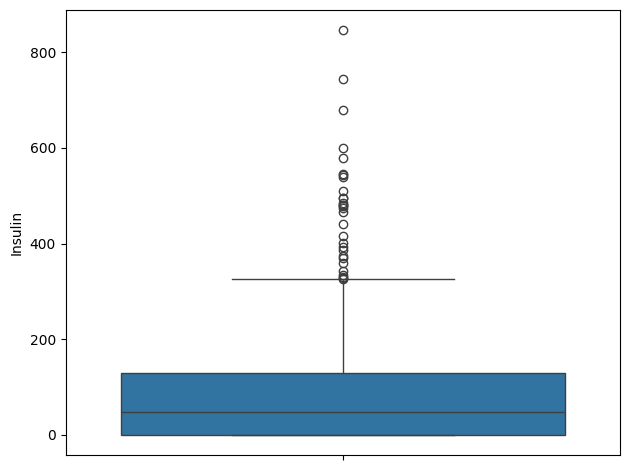

 N. of outliers: 9
TopOutliers perc: 0.012448132780082987


In [188]:
sns.boxplot(df_noskin['Insulin'])
plt.tight_layout()
plt.show()
x = 500
outliers = len(df_noskin[df_noskin['Insulin'] > x])
print(f" N. of outliers: {outliers}")
print(f"TopOutliers perc: {outliers / len(df_noskin)}")
### this variable is highly dispersed, and I belive removing outliers is not helpful (there will always be)
### and the data set is too small to remove them, so we will keep them

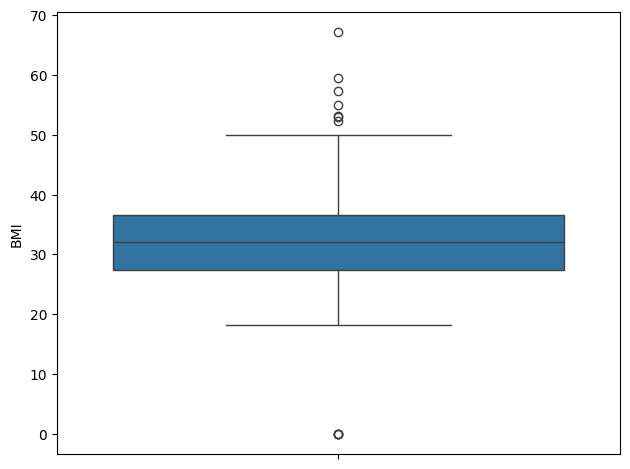

 N. of zeros: 4
Zeros %: 0.005532503457814661


In [191]:
sns.boxplot(df_noskin['BMI'])
plt.tight_layout()
plt.show()
x = 500
outliers = len(df_noskin[df_noskin['BMI'] == 0])
print(f" N. of zeros: {outliers}")
print(f"Zeros %: {outliers / len(df_noskin)}")

In [192]:
## Since this is a very small number of zeros (BMI cannot be zero) I will replace them with the column mean

df_noskin['BMI'] = df_noskin['BMI'].replace(0,df_noskin['BMI'].mean())


In [193]:
df_noskin.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,3.803596,121.650069,72.452282,84.170124,32.437533,0.476813,33.298755,0.338866
std,3.269118,30.539708,12.420445,117.071858,6.882008,0.335380,11.815729,0.473652
min,0.000000,44.000000,24.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,48.000000,32.259059,0.380000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,130.000000,36.550000,0.630000,41.000000,1.000000
max,13.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


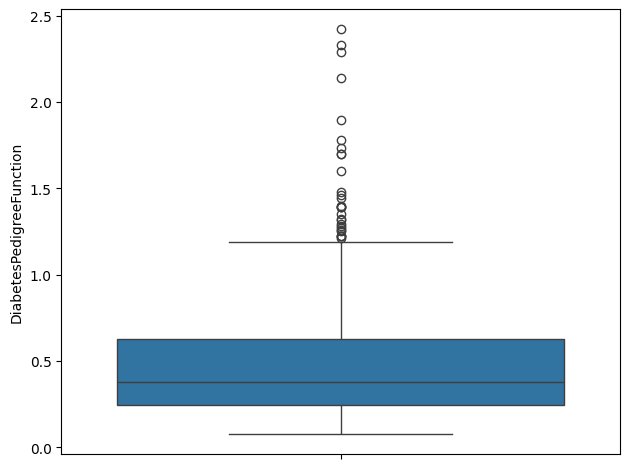

 N. of outliers: 10
Outlier %: 0.013831258644536652


In [195]:
sns.boxplot(df_noskin['DiabetesPedigreeFunction'])
plt.tight_layout()
plt.show()
x = 500
outliers = len(df_noskin[df_noskin['DiabetesPedigreeFunction'] > 1.5])
print(f" N. of outliers: {outliers}")
print(f"Outlier %: {outliers / len(df_noskin)}")




### Very small amount of outliers, we can delete / substitute
